# Numerical integration

This is a Python implementation of the visualization offered in the webapp [a-herzog.github.io/NumericalIntegration](https://a-herzog.github.io/NumericalIntegration/).

## Importing libraries

In [696]:
from typing import Callable
import numpy as np
import numpy.typing as npt
import pandas as pd
from scipy.integrate import quad
import matplotlib.pyplot as plt
from matplotlib.axes import Axes

plt.style.use('seaborn-v0_8')

## Pre-defined example functions

In [697]:
def f1(x: npt.NDArray[np.float64]) -> npt.NDArray[np.float64]:
    return x**2


def f2(x: npt.NDArray[np.float64]) -> npt.NDArray:
    return np.sin(x / 2) + 2


def f3(x: npt.NDArray[np.float64]) -> npt.NDArray:
    return np.sin(10 * x) + 2


def f4(x: npt.NDArray[np.float64]) -> npt.NDArray[np.float64]:
    return (x / 3)**4 - 8 * (x / 3)**2 + 20


# Example functions
functions = {
    "x^2": f1,
    "sin(x/2)+2": f2,
    "sin(10*x)+2": f3,
    "(x/3)^4-8*(x/3)^2+20": f4
}

## Different numerical integration methods

In [698]:
def rectangle_rule_left(f: Callable[[npt.NDArray[np.float64]], npt.NDArray], a: float, b: float, n: int) -> tuple[float, npt.NDArray[np.float64], float]:
    """Calculate approximation of the integral value of the function using the rectangle rule (control points on the left side of each bar).

    Args:
        f (Callable[[npt.NDArray[np.float64]], npt.NDArray]): Function to be numrtical integrated
        a (float): Lower limit of the x range
        b (float): Upper limit of the x range
        n (int): Numer of steps (must be &ge;1)

    Returns:
        tuple[float, npt.NDArray, float]: Approximation of the numerical integration, array of the used x values, step width
    """

    h = (b - a) / n
    x = np.linspace(a, b - h, n)
    y = f(x)

    return h * np.sum(y), x, h


def rectangle_rule_middle(f: Callable[[npt.NDArray[np.float64]], npt.NDArray], a: float, b: float, n: int) -> tuple[float, npt.NDArray[np.float64], float]:
    """Calculate approximation of the integral value of the function using the rectangle rule (control points in the middle of each bar).

    Args:
        f (Callable[[npt.NDArray[np.float64]], npt.NDArray]): Function to be numrtical integrated
        a (float): Lower limit of the x range
        b (float): Upper limit of the x range
        n (int): Numer of steps (must be &ge;1)

    Returns:
        tuple[float, npt.NDArray, float]: Approximation of the numerical integration, array of the used x values, step width
    """

    h = (b - a) / n
    x = np.linspace(a + h / 2, b - h / 2, n)
    y = f(x)

    return h * np.sum(y), x, h


def rectangle_rule_right(f: Callable[[npt.NDArray[np.float64]], npt.NDArray], a: float, b: float, n: int) -> tuple[float, npt.NDArray[np.float64], float]:
    """Calculate approximation of the integral value of the function using the rectangle rule (control points on the right side of each bar).

    Args:
        f (Callable[[npt.NDArray[np.float64]], npt.NDArray]): Function to be numrtical integrated
        a (float): Lower limit of the x range
        b (float): Upper limit of the x range
        n (int): Numer of steps (must be &ge;1)

    Returns:
        tuple[float, npt.NDArray, float]: Approximation of the numerical integration, array of the used x values, step width
    """

    h = (b - a) / n
    x = np.linspace(a + h, b, n)
    y = f(x)

    return h * np.sum(y), x, h


def trapezoid_rule(f: Callable[[npt.NDArray[np.float64]], npt.NDArray], a: float, b: float, n: int) -> tuple[float, npt.NDArray[np.float64], float]:
    """Calculate approximation of the integral value of the function using the trapezoid rule.

    Args:
        f (Callable[[npt.NDArray[np.float64]], npt.NDArray]): Function to be numrtical integrated
        a (float): Lower limit of the x range
        b (float): Upper limit of the x range
        n (int): Numer of steps (must be &ge;1)

    Raises:
        ValueError: Is rised if an invalid mode is specified.

    Returns:
        tuple[float, npt.NDArray, float]: Approximation of the numerical integration, array of the used x values, step width
    """

    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    y = f(x)

    return h * (np.sum(y) - 0.5 * (y[0] + y[-1])), x, h


def simpson_rule(f: Callable[[npt.NDArray[np.float64]], npt.NDArray], a: float, b: float, n: int) -> tuple[float, npt.NDArray[np.float64], float]:
    """Calculate approximation of the integral value of the function using Simpson's rule.

    Args:
        f (Callable[[npt.NDArray[np.float64]], npt.NDArray]): Function to be numrtical integrated
        a (float): Lower limit of the x range
        b (float): Upper limit of the x range
        n (int): Numer of steps (must be &ge;1)

    Raises:
        ValueError: Is rised if an invalid mode is specified.

    Returns:
        tuple[float, npt.NDArray, float]: Approximation of the numerical integration, array of the used x values, step width
    """

    h = (b - a) / n
    x = np.linspace(a, b, 2 * n + 1)
    y = f(x)

    return h / 6 * (np.sum(y) + np.sum(y[1:-1]) + 2 * np.sum(y[1:-1:2])), x, h

## Plot results

In [699]:
def plot_rectangle_rule_left(ax: Axes, f: Callable[[npt.NDArray[np.float64]], npt.NDArray], x: npt.NDArray[np.float64], h: float) -> None:
    """Plot the approximation using the rectangle rule (control points on the left side of each bar).

    Args:
        ax (Axes) Plot to add the data
        f (Callable[[npt.NDArray[np.float64]], npt.NDArray]): Function to be numrtical integrated
        x (npt.NDArray[np.float64]): x values
        h (float): Step width
    """

    for i in range(len(x)):
        ax.bar(x[i], f(x[i]), width=h, linewidth=1, align='edge', edgecolor='red', color='#FF000020', label='Rectangle rule' if i == 0 else None)
    ax.scatter(x, f(x), color='red')


def plot_rectangle_rule_middle(ax: Axes, f: Callable[[npt.NDArray[np.float64]], npt.NDArray], x: npt.NDArray[np.float64], h: float) -> None:
    """Plot the approximation using the rectangle rule (control points in the middle of each bar).

    Args:
        ax (Axes) Plot to add the data
        f (Callable[[npt.NDArray[np.float64]], npt.NDArray]): Function to be numrtical integrated
        x (npt.NDArray[np.float64]): x values
        h (float): Step width
    """

    for i in range(len(x)):
        ax.bar(x[i] - h / 2, f(x[i]), width=h, linewidth=1, align='edge', edgecolor='red', color='#FF000020', label='Rectangle rule' if i == 0 else None)
    ax.scatter(x, f(x), color='red')


def plot_rectangle_rule_right(ax: Axes, f: Callable[[npt.NDArray[np.float64]], npt.NDArray], x: npt.NDArray[np.float64], h: float) -> None:
    """Plot the approximation using the rectangle rule (control points on the right side of each bar).

    Args:
        ax (Axes) Plot to add the data
        f (Callable[[npt.NDArray[np.float64]], npt.NDArray]): Function to be numrtical integrated
        x (npt.NDArray[np.float64]): x values
        h (float): Step width
    """

    for i in range(len(x)):
        ax.bar(x[i] - h, f(x[i]), width=h, linewidth=1, align='edge', edgecolor='red', color='#FF000020', label='Rectangle rule' if i == 0 else None)
    ax.scatter(x, f(x), color='red')


def plot_trapezoid_rule(ax: Axes, f: Callable[[npt.NDArray[np.float64]], npt.NDArray], x: npt.NDArray[np.float64], h: float) -> None:
    """Plot the approximation using the trapezoid rule.

    Args:
        ax (Axes) Plot to add the data
        f (Callable[[npt.NDArray[np.float64]], npt.NDArray]): Function to be numrtical integrated
        x (npt.NDArray[np.float64]): x values
        h (float): Step width
    """

    for i in range(len(x) - 1):
        ax.fill_between([x[i], x[i + 1]], [f(x[i]), f(x[i + 1])], linewidth=1, edgecolor='red', color='#FF000020', label='Trapezoid rule' if i == 0 else None)
        ax.plot([x[i], x[i], x[i + 1], x[i + 1]], [0, float(f(x[i])), float(f(x[i + 1])), 0], color='red', linewidth=1)
    ax.scatter(x, f(x), color='red')


def plot_simpson_rule(ax: Axes, f: Callable[[npt.NDArray[np.float64]], npt.NDArray], x: npt.NDArray[np.float64], h: float) -> None:
    """Plot the approximation using the Simpson's rule.

    Args:
        ax (Axes) Plot to add the data
        f (Callable[[npt.NDArray[np.float64]], npt.NDArray]): Function to be numrtical integrated
        x (npt.NDArray[np.float64]): x values
        h (float): Step width
    """

    innerSteps = round(1000 / h)
    for i in range(0, (len(x) - 1) // 2):
        x_min = x[0] + i * h
        x_max = x_min + h
        y1 = f(x_min)
        y2 = f(x_min + h / 2)
        y3 = f(x_max)

        points = []
        points.append([x_min, 0])
        points.append([x_min, y1])
        p1 = (y2 - y1) / (h / 2)
        p2 = ((y3 - y2) / (h / 2) - p1) / h
        for j in range(1, innerSteps):
            xinner = x_min + j * h / innerSteps
            points.append([xinner, y1 + (xinner - x_min) * (p1 + (xinner - (x_min + h / 2)) * p2)])
        points.append([x_max, y3])
        points.append([x_max, 0])
        points_x = [x for x, _ in points]
        points_y = [y for _, y in points]
        ax.fill_between(points_x, points_y, linewidth=1, edgecolor='red', color='#FF000020', label='Simpson\'s rule' if i == 0 else None)
        ax.plot(points_x, points_y, color='red', linewidth=1)

    ax.scatter(x, f(x), color='red')


# Interpolation methods
interpolation_methods = {
    'rectangle_left': {'name': 'Rectangle rule (left)', 'calc': rectangle_rule_left, 'plot': plot_rectangle_rule_left},
    'rectangle_middle': {'name': 'Rectangle rule (middle)', 'calc': rectangle_rule_middle, 'plot': plot_rectangle_rule_middle},
    'rectangle_right': {'name': 'Rectangle rule (right)', 'calc': rectangle_rule_right, 'plot': plot_rectangle_rule_right},
    'trapezoid': {'name': 'Trapezoid rule', 'calc': trapezoid_rule, 'plot': plot_trapezoid_rule},
    'simpson': {'name': 'Simpson\'s rule', 'calc': simpson_rule, 'plot': plot_simpson_rule},
}


def plot_integration(ax: Axes, f: Callable[[npt.NDArray[np.float64]], npt.NDArray], a: float, b: float, n: int, method: dict) -> tuple[float, float, float, float, int]:
    """Plots a function and the integral approxmations.

    Args:
        ax (Axes) Plot to add the data
        f (Callable[[npt.NDArray[np.float64]], npt.NDArray]): Function to be numrtical integrated
        a (float): Lower limit of the x range
        b (float): Upper limit of the x range
        n (int): Numer of steps (must be &ge;1)
        method (dict): Interpolation method to be used

    Returns:
        tuple[float, float, float, float, int]: exact value, approximation value, absolute error, relative error, needed function evaluations
    """

    # Compute approximation
    approx, x, h = method['calc'](f, a, b, n)

    # Exact value
    exact, _ = quad(f, a, b)
    abs_err = exact - approx
    rel_err = np.abs(abs_err) / np.abs(exact) if exact != 0 else np.nan

    # Plot function
    X = np.linspace(a, b, 500)
    Y = f(X)
    ax.plot(X, Y, label='Function', color='green')

    # Plot approximation bars
    method["plot"](ax, f, x, h)

    # Configure plot
    ax.set_title(f"{method['name']}, absolute error={abs_err:.4f}, relative error={rel_err*100:.2f}%")
    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')
    ax.legend()
    ax.grid(True)

    return exact, approx, abs_err, rel_err, len(x)


def plot_all_integrations(f: Callable[[npt.NDArray[np.float64]], npt.NDArray], a: float, b: float, n: int) -> pd.DataFrame:
    """Calculates the integral approximations according to all available methods plots the results and return a data frame containing the performance data.

    Args:
        f (Callable[[npt.NDArray[np.float64]], npt.NDArray]): Function to be numrtical integrated
        a (float): Lower limit of the x range
        b (float): Upper limit of the x range
        n (int): Numer of steps (must be &ge;1)

    Returns:
        pd.DataFrame: Performance information for the different approximation methods
    """
    plt.figure(figsize=(25, 10))
    ax = [plt.subplot(2, 3, i) for i in range(1, 6)]

    name = []
    exact = []
    approx = []
    abs_err = []
    rel_err = []
    steps = []
    for index, method_name in enumerate(interpolation_methods):
        exact_value, approx_value, abs_err_value, rel_err_value, steps_value = plot_integration(ax[index], f, a, b, n, interpolation_methods[method_name])
        name.append(method_name)
        exact.append(exact_value)
        approx.append(approx_value)
        abs_err.append(abs_err_value)
        rel_err.append(rel_err_value)
        steps.append(steps_value)

    return pd.DataFrame({'Method': name, 'Exact': exact, 'Approx': approx, 'AbsError': abs_err, 'RelError': rel_err, 'FuntionEvaluations': steps})

## Test with different example functions

### $x^2$

,Method,Exact,Approx,AbsError,RelError,FuntionEvaluations
0,rectangle_left,333.333333,185.185185,148.148148,44.44%,3
1,rectangle_middle,333.333333,324.074074,9.259259,2.78%,3
2,rectangle_right,333.333333,518.518519,-185.185185,55.56%,3
3,trapezoid,333.333333,351.851852,-18.518519,5.56%,4
4,simpson,333.333333,333.333333,-0.000000,0.00%,7


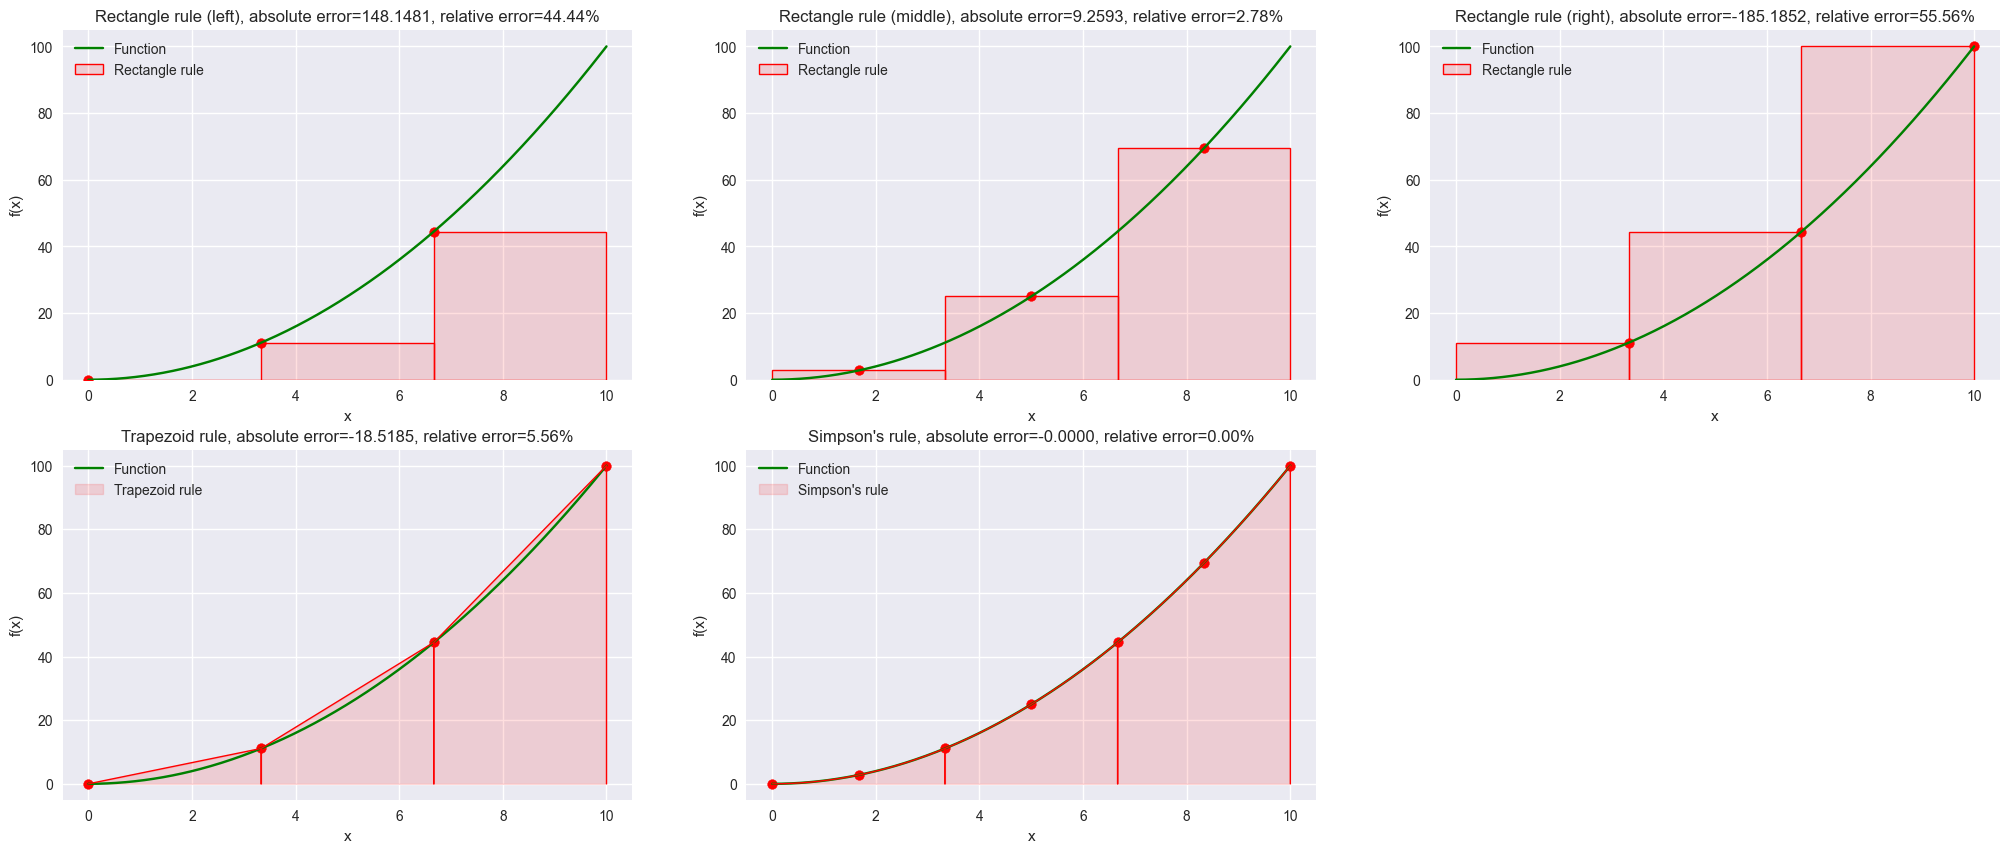

In [700]:
f = functions["x^2"]
a, b = 0, 10
n = 3

df = plot_all_integrations(f, a, b, n)
df.style.format({'RelError': "{:.2%}"})

### $\sin\left(\frac{x}{2}\right)+2$

,Method,Exact,Approx,AbsError,RelError,FuntionEvaluations
0,rectangle_left,21.432676,22.992361,-1.559685,7.28%,2
1,rectangle_middle,21.432676,21.887117,-0.454441,2.12%,2
2,rectangle_right,21.432676,18.197739,3.234936,15.09%,2
3,trapezoid,21.432676,20.595050,0.837626,3.91%,3
4,simpson,21.432676,21.456428,-0.023752,0.11%,5


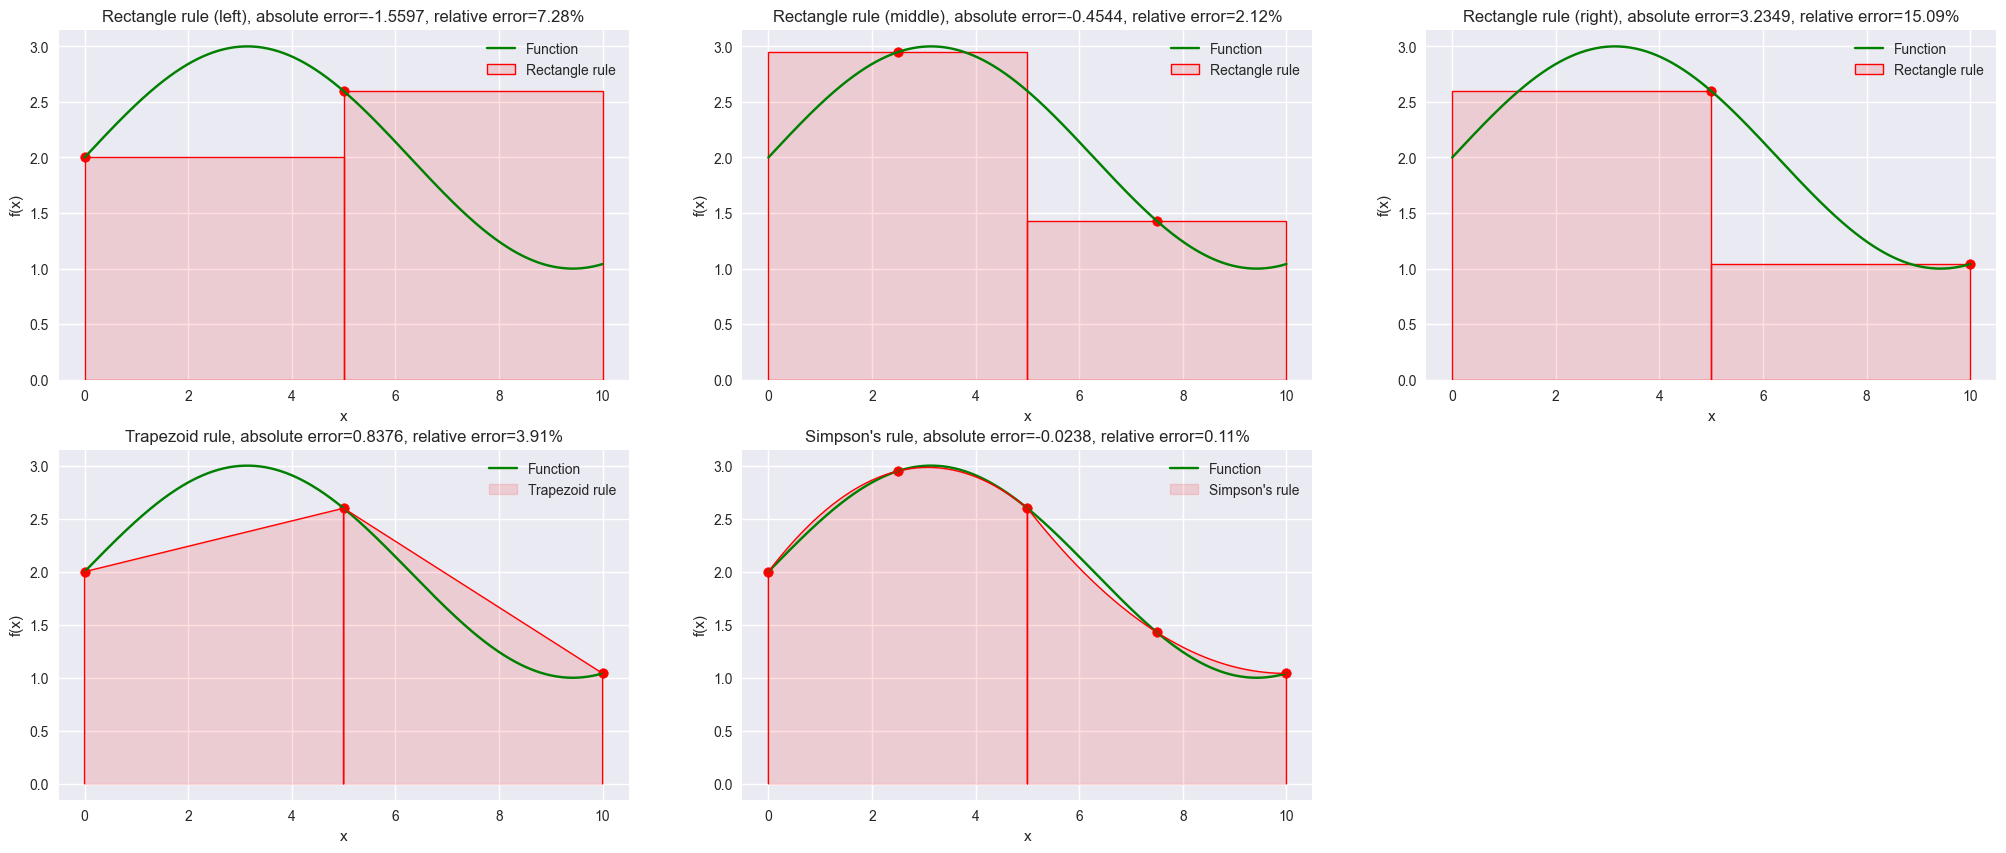

In [701]:
f = functions["sin(x/2)+2"]
a, b = 0, 10
n = 2

df = plot_all_integrations(f, a, b, n)
df.style.format({'RelError': "{:.2%}"})

### $\sin(10\cdot x)+2$

,Method,Exact,Approx,AbsError,RelError,FuntionEvaluations
0,rectangle_left,20.013768,20.080515,-0.066747,0.33%,20
1,rectangle_middle,20.013768,20.057514,-0.043745,0.22%,20
2,rectangle_right,20.013768,19.827332,0.186436,0.93%,20
3,trapezoid,20.013768,19.953923,0.059845,0.30%,21
4,simpson,20.013768,20.022984,-0.009215,0.05%,41


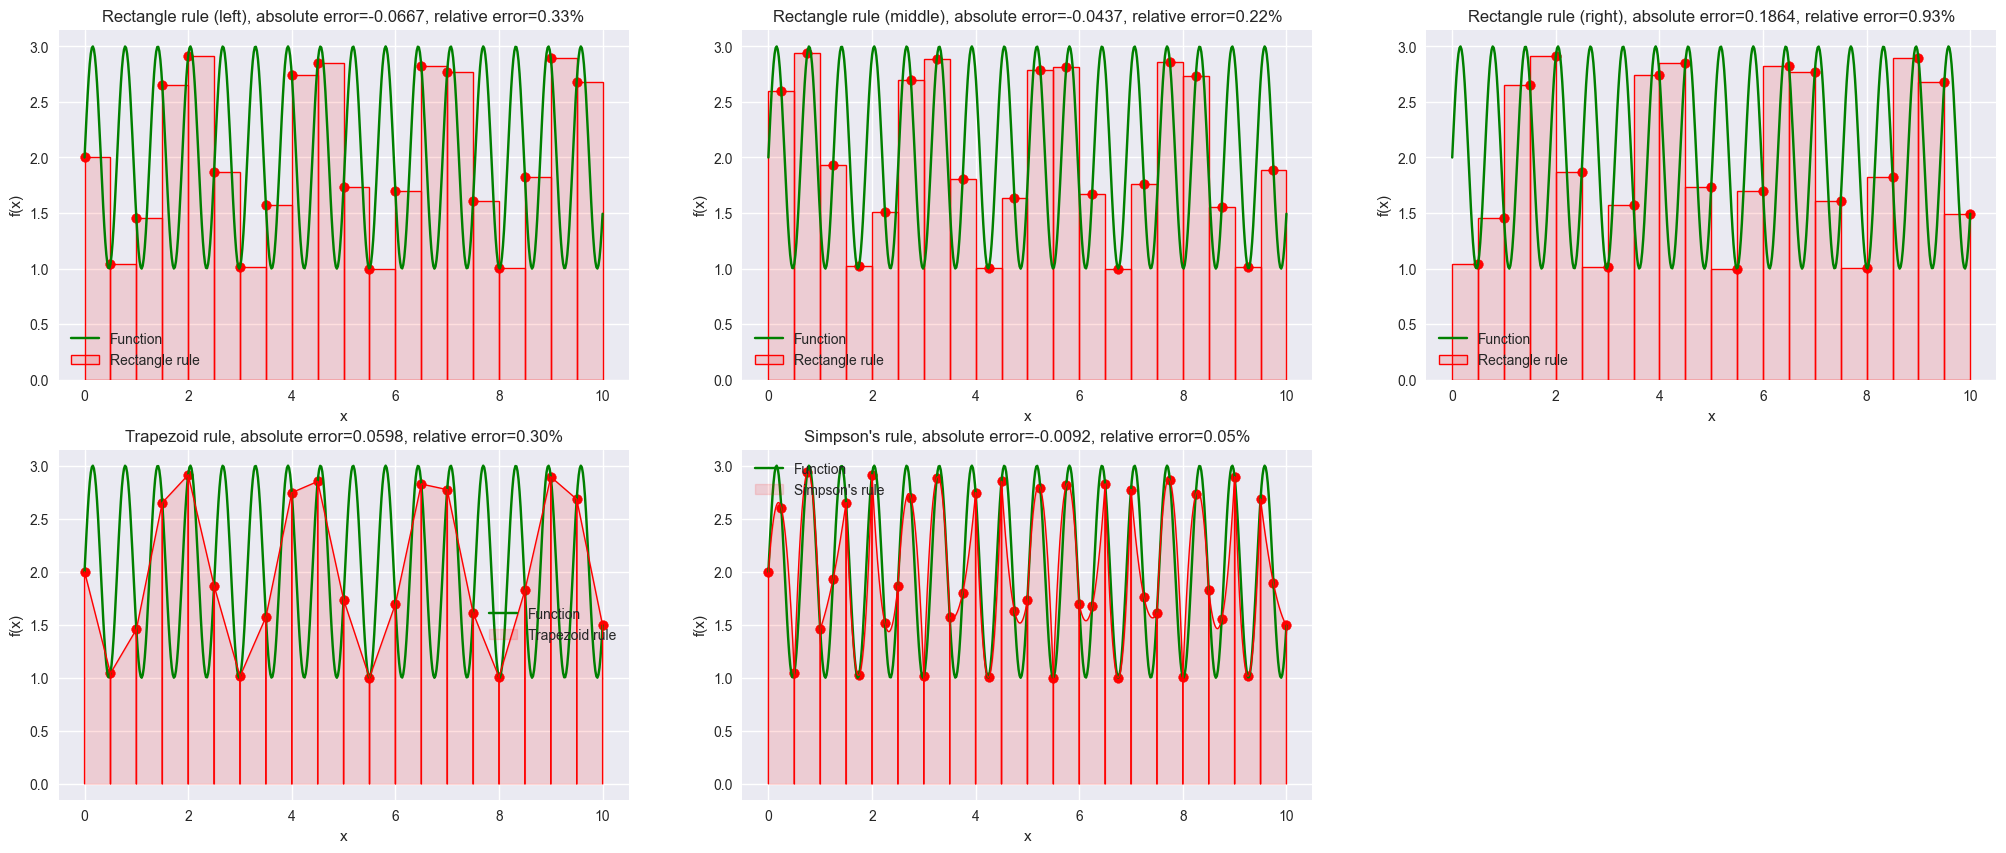

In [702]:
f = functions["sin(10*x)+2"]
a, b = 0, 10
n = 20

df = plot_all_integrations(f, a, b, n)
df.style.format({'RelError': "{:.2%}"})

### $\left(\frac{x}{3}\right)^4-8\cdot\left(\frac{x}{3}\right)^2+20$

,Method,Exact,Approx,AbsError,RelError,FuntionEvaluations
0,rectangle_left,150.617284,127.469136,23.148148,15.37%,2
1,rectangle_middle,150.617284,119.945988,30.671296,20.36%,2
2,rectangle_right,150.617284,300.308642,-149.691358,99.39%,2
3,trapezoid,150.617284,213.888889,-63.271605,42.01%,3
4,simpson,150.617284,151.260288,-0.643004,0.43%,5


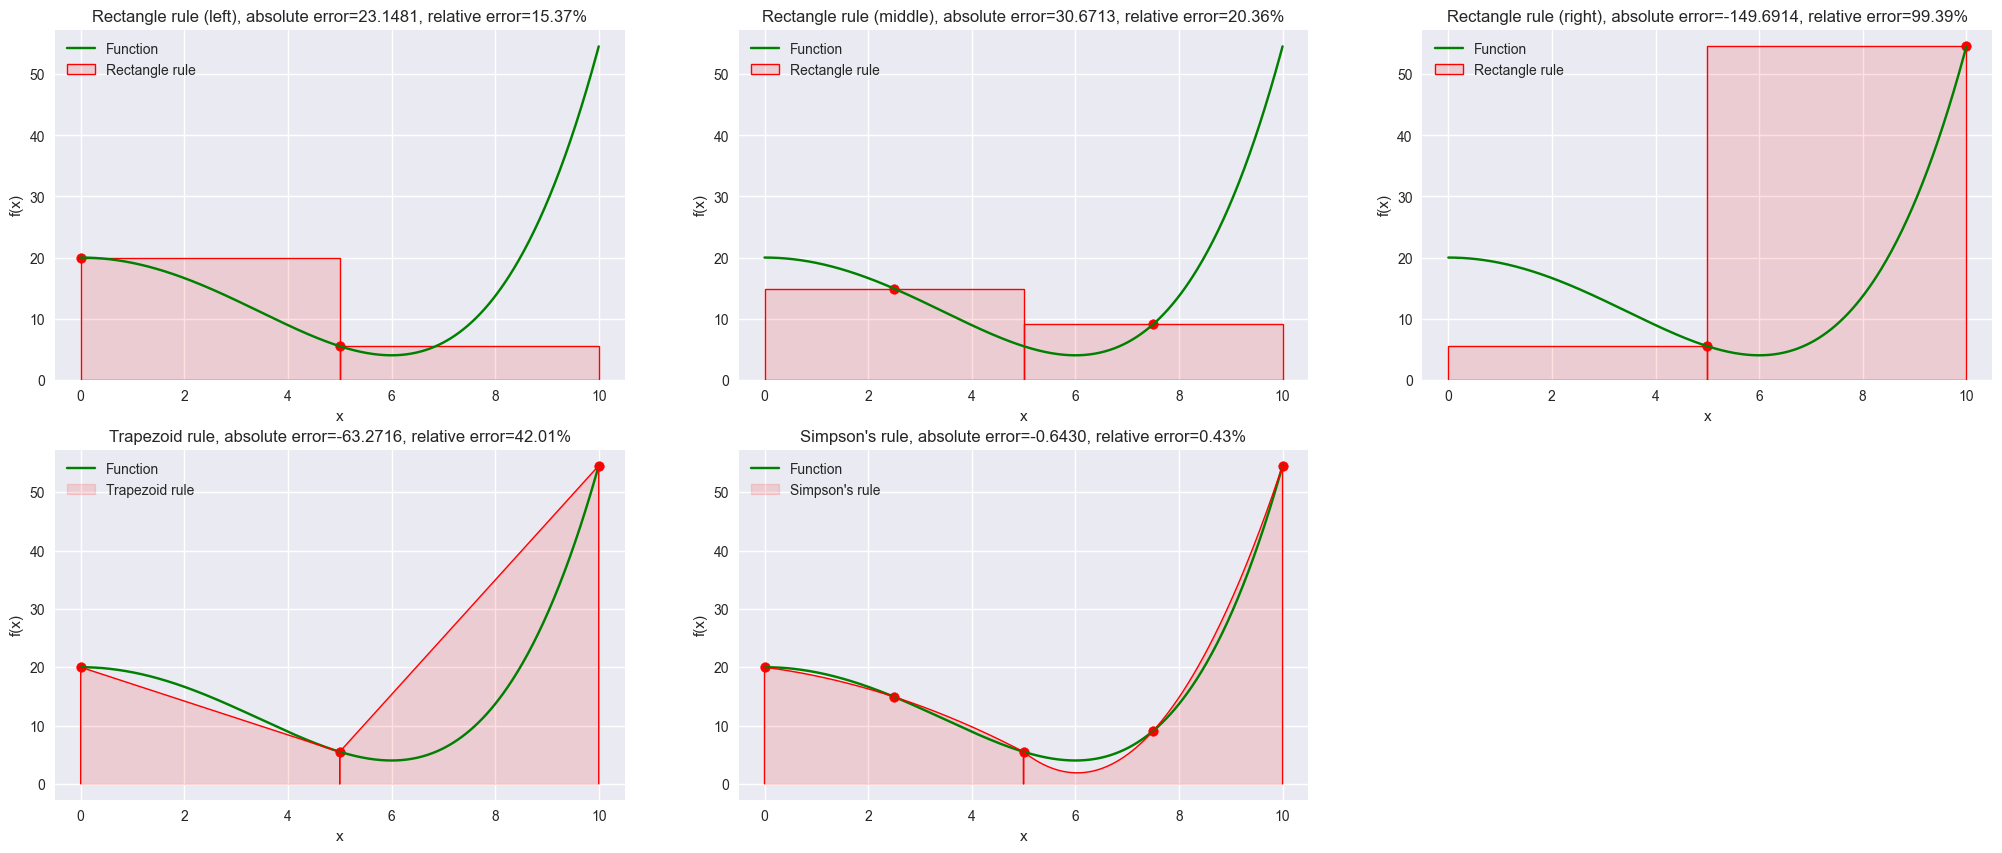

In [703]:
f = functions["(x/3)^4-8*(x/3)^2+20"]
a, b = 0, 10
n = 2

df = plot_all_integrations(f, a, b, n)
df.style.format({'RelError': "{:.2%}"})